In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\Jainam\Desktop\\ai_assn\\Assignment_1.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = df.drop(['Id'],axis=1) #id not required

In [4]:
df_numcols = df.select_dtypes(exclude = 'O')
df_numcols # selecting columns with numbers values

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [5]:
for f in df_numcols.columns:
    print(f'Null values in {f} = {df_numcols[f].isna().sum()}')

Null values in MSSubClass = 0
Null values in LotFrontage = 259
Null values in LotArea = 0
Null values in OverallQual = 0
Null values in OverallCond = 0
Null values in YearBuilt = 0
Null values in YearRemodAdd = 0
Null values in MasVnrArea = 8
Null values in BsmtFinSF1 = 0
Null values in BsmtFinSF2 = 0
Null values in BsmtUnfSF = 0
Null values in TotalBsmtSF = 0
Null values in 1stFlrSF = 0
Null values in 2ndFlrSF = 0
Null values in LowQualFinSF = 0
Null values in GrLivArea = 0
Null values in BsmtFullBath = 0
Null values in BsmtHalfBath = 0
Null values in FullBath = 0
Null values in HalfBath = 0
Null values in BedroomAbvGr = 0
Null values in KitchenAbvGr = 0
Null values in TotRmsAbvGrd = 0
Null values in Fireplaces = 0
Null values in GarageYrBlt = 81
Null values in GarageCars = 0
Null values in GarageArea = 0
Null values in WoodDeckSF = 0
Null values in OpenPorchSF = 0
Null values in EnclosedPorch = 0
Null values in 3SsnPorch = 0
Null values in ScreenPorch = 0
Null values in PoolArea = 0


In [6]:
df_numcols_nan = df_numcols[['LotFrontage','MasVnrArea','GarageYrBlt']]
for i in df_numcols_nan:
    median_val = df_numcols[i].median()
    df_numcols[i].fillna(median_val,inplace=True)

C:\Users\Jainam\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
for f in df_numcols.columns:
    if df_numcols[f].isna().sum()>1:
        print(f)
#no null values

In [8]:
#Month Sold not important
df_numcols.drop(['MoSold'],axis=1, inplace=True)
df.drop(['MoSold'],axis=1,inplace=True)

C:\Users\Jainam\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
print(len(df.columns))

79


In [10]:
df_numcols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
#discrete and continuous variables
disc_var = []
cont_var = []

In [12]:
for i in df_numcols.columns:
    print(f'Unique values in {i} are {len(df[i].unique())}')

Unique values in MSSubClass are 15
Unique values in LotFrontage are 111
Unique values in LotArea are 1073
Unique values in OverallQual are 10
Unique values in OverallCond are 9
Unique values in YearBuilt are 112
Unique values in YearRemodAdd are 61
Unique values in MasVnrArea are 328
Unique values in BsmtFinSF1 are 637
Unique values in BsmtFinSF2 are 144
Unique values in BsmtUnfSF are 780
Unique values in TotalBsmtSF are 721
Unique values in 1stFlrSF are 753
Unique values in 2ndFlrSF are 417
Unique values in LowQualFinSF are 24
Unique values in GrLivArea are 861
Unique values in BsmtFullBath are 4
Unique values in BsmtHalfBath are 3
Unique values in FullBath are 4
Unique values in HalfBath are 3
Unique values in BedroomAbvGr are 8
Unique values in KitchenAbvGr are 4
Unique values in TotRmsAbvGrd are 12
Unique values in Fireplaces are 4
Unique values in GarageYrBlt are 98
Unique values in GarageCars are 5
Unique values in GarageArea are 441
Unique values in WoodDeckSF are 274
Unique val

In [13]:
#differentiating between discrete and continious variables
for i in df_numcols.columns:
    if len(df[i].unique())<22:
        disc_var.append(i)
    else:
        cont_var.append(i)


In [14]:
disc_var,cont_var

(['MSSubClass',
  'OverallQual',
  'OverallCond',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  '3SsnPorch',
  'PoolArea',
  'MiscVal',
  'YrSold'],
 ['LotFrontage',
  'LotArea',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'GarageYrBlt',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  'ScreenPorch',
  'SalePrice'])

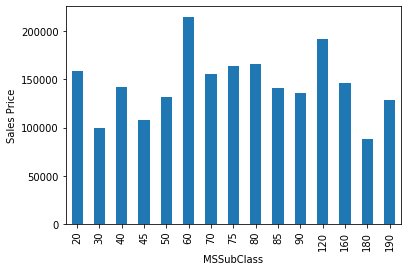

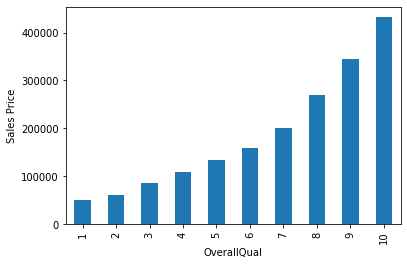

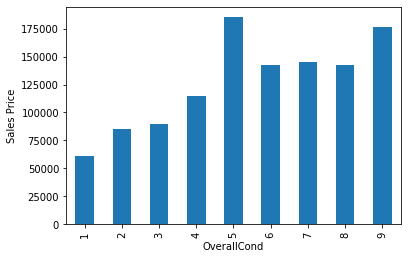

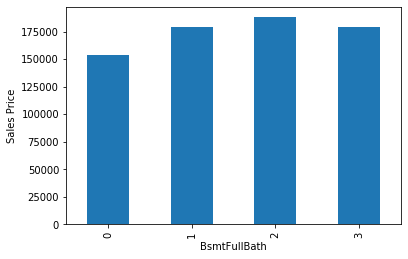

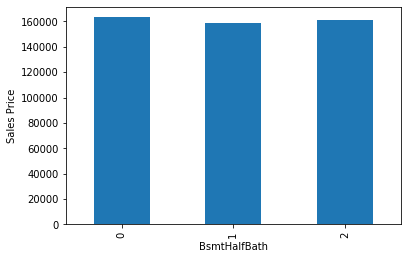

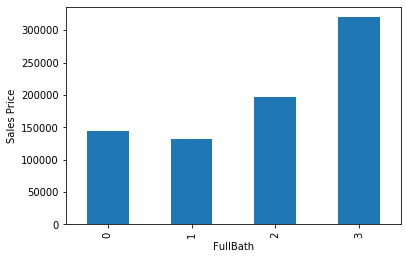

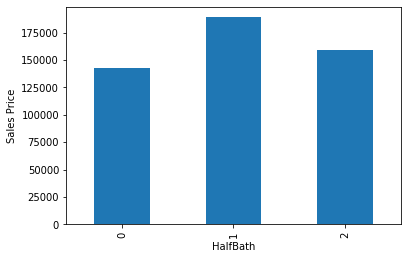

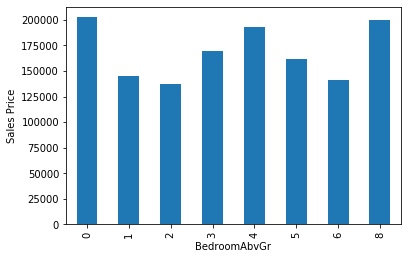

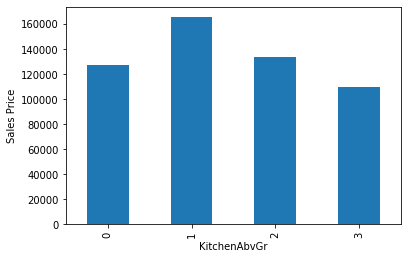

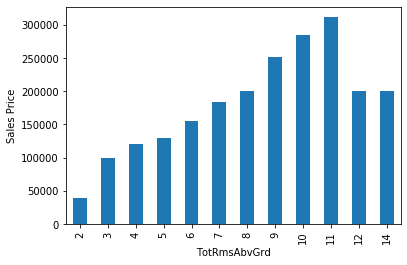

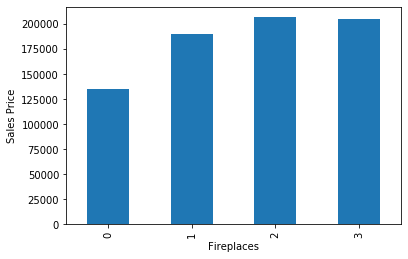

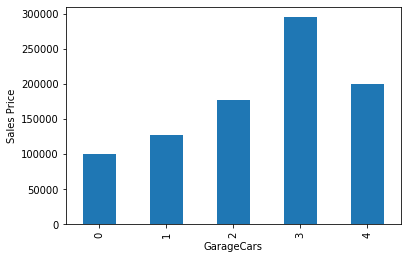

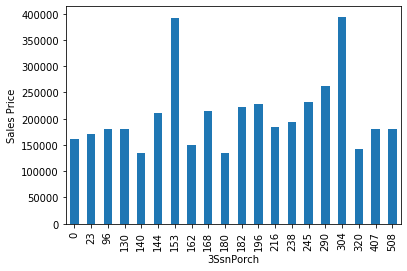

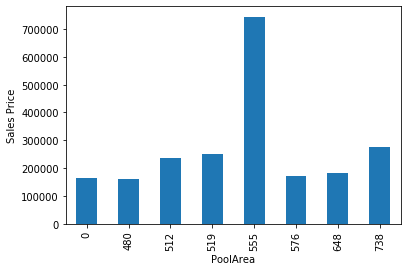

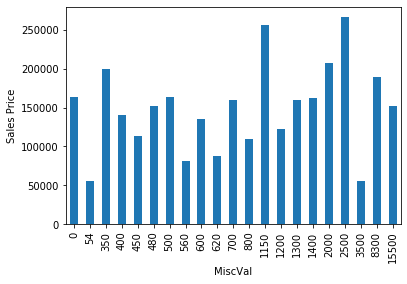

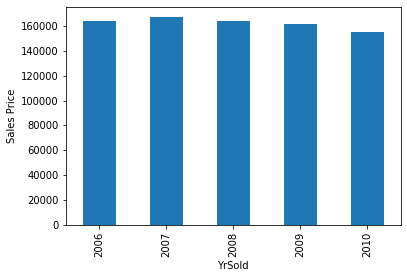

In [15]:
for i in disc_var:
    df.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Sales Price')
    plt.show()

In [16]:
#extracting year columns 
year_cols = df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
year_cols 

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


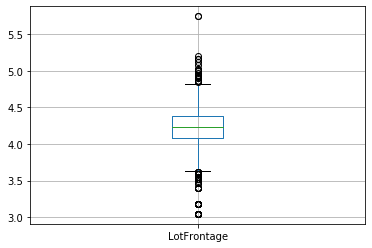

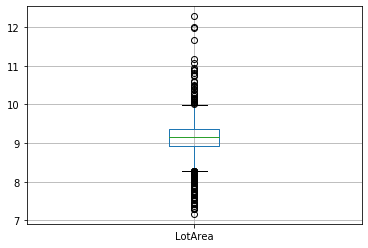

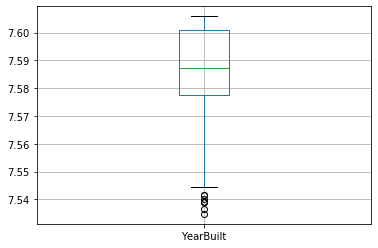

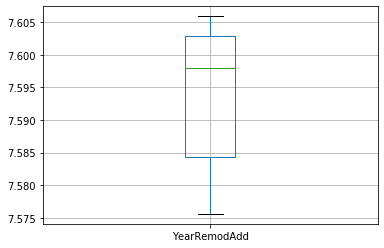

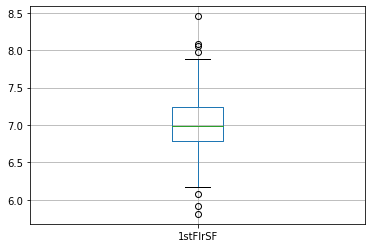

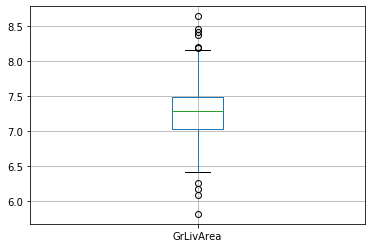

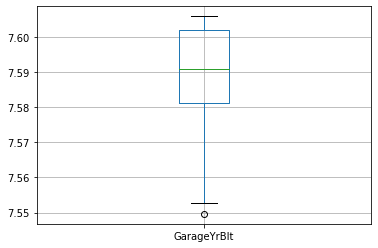

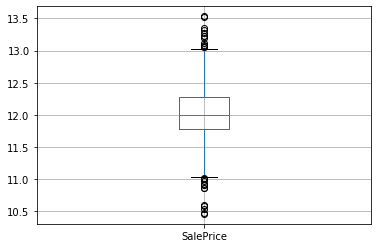

In [17]:
for i in cont_var:
    if 0 in df[i].unique():
        pass
    else:
        df[i]=np.log(df[i])
        df.boxplot(column=i)
        plt.show()

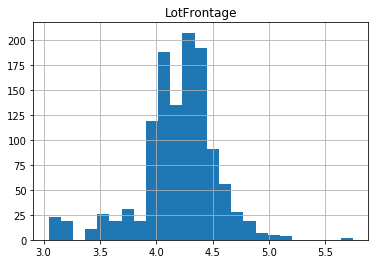

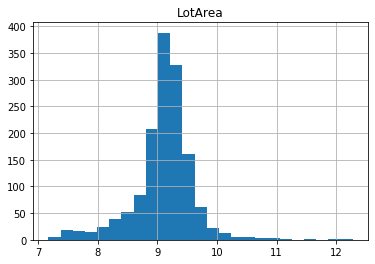

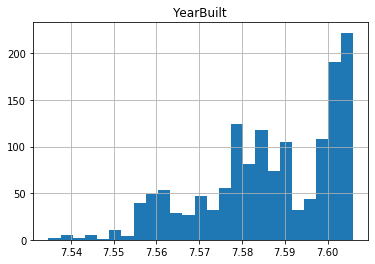

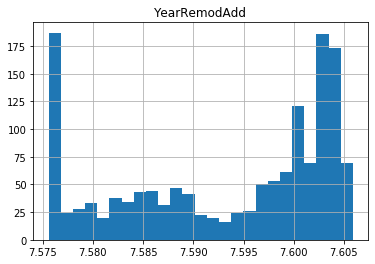

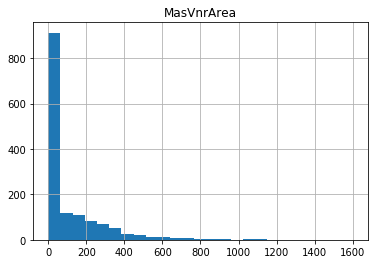

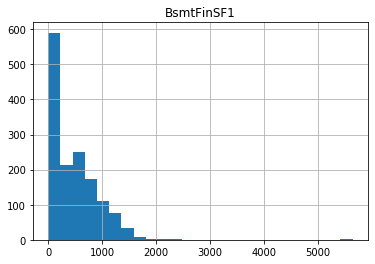

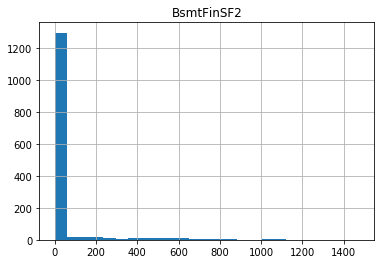

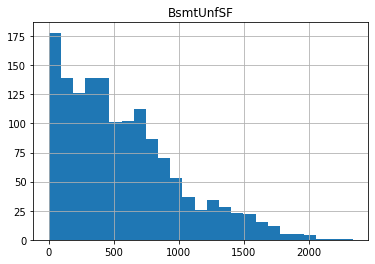

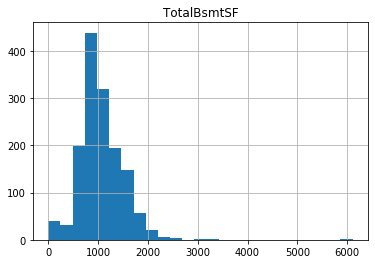

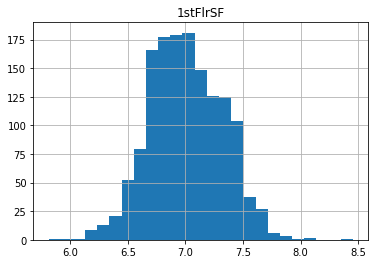

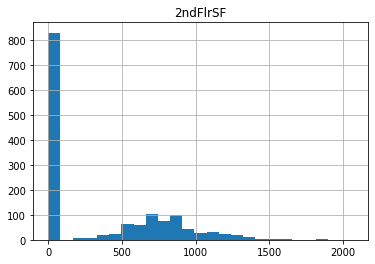

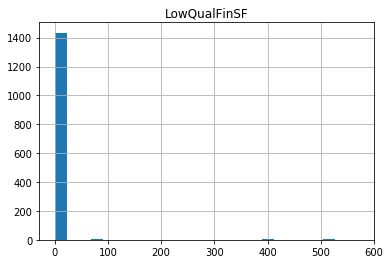

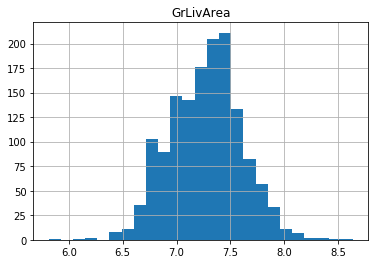

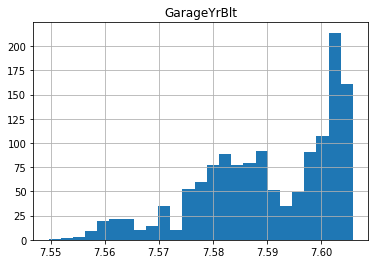

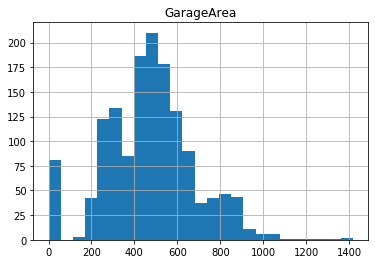

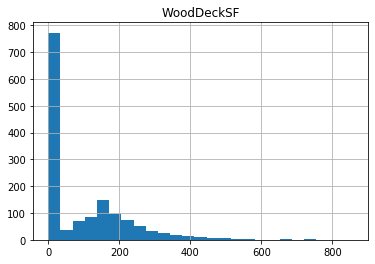

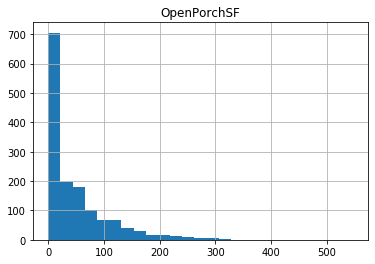

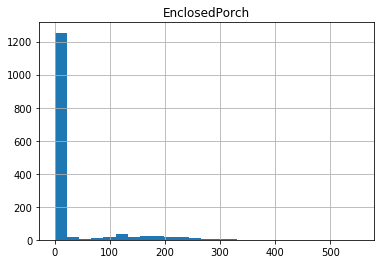

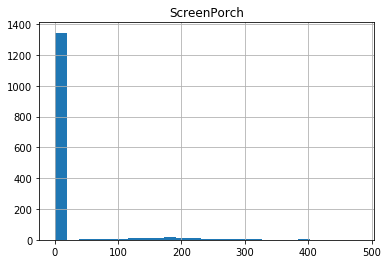

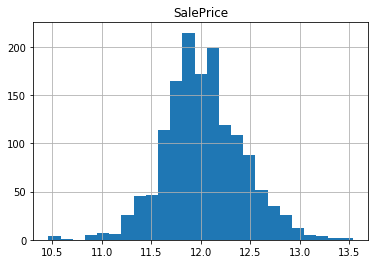

In [18]:
for f in cont_var:
    df[f].hist(bins=25)
    plt.title(f)
    plt.show()

In [19]:
#we only take columns whose graph has gaussian distribution
#LotFrontage, LotArea, TotalBsmtSF, 1stFlrSF, GrLivArea

In [20]:
#categorical features
categor = df.select_dtypes(include='O')
categor

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
for i in categor.columns:
    print(df[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

In [22]:
df.drop(['Street','LandContour','Utilities','LandSlope','Condition1','Condition2'],axis=1,inplace=True)

In [23]:
df.drop(['BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','SaleType','SaleCondition'],axis=1,inplace=True)

In [24]:
df.shape

(1460, 57)

In [25]:
na_cols=[]
for i in df.columns:
    if df[i].isnull().sum()>1:
        na_cols.append(i)
        print(f'Null values in {i} are {df[i].isnull().sum()}')

Null values in LotFrontage are 259
Null values in Alley are 1369
Null values in MasVnrType are 8
Null values in MasVnrArea are 8
Null values in BsmtQual are 37
Null values in BsmtExposure are 38
Null values in FireplaceQu are 690
Null values in GarageType are 81
Null values in GarageYrBlt are 81
Null values in GarageFinish are 81
Null values in Fence are 1179
Null values in MiscFeature are 1406


In [26]:
#we drop columns with many missing values
df.drop(['Alley','FireplaceQu','Fence','MiscFeature'],axis=1,inplace=True)


In [30]:
na_cols=[]
for i in df.columns:
    if df[i].isnull().sum()>1:
        na_cols.append(i)
        print(f'Null values in {i} are {df[i].isnull().sum()}')

Null values in MasVnrType are 8
Null values in BsmtQual are 37
Null values in BsmtExposure are 38
Null values in GarageType are 81
Null values in GarageFinish are 81


In [28]:
for i in na_cols:
    if df[i].dtypes!='O':
        df[i].fillna(df[i].median(),inplace=True)

In [29]:
df['LotFrontage']

0       4.174387
1       4.382027
2       4.219508
3       4.094345
4       4.430817
          ...   
1455    4.127134
1456    4.442651
1457    4.189655
1458    4.219508
1459    4.317488
Name: LotFrontage, Length: 1460, dtype: float64

In [31]:
#in year columns we remove GarageYrBlt and YearRemodAdd 
df.drop(['GarageYrBlt','YearRemodAdd'],axis=1,inplace=True)

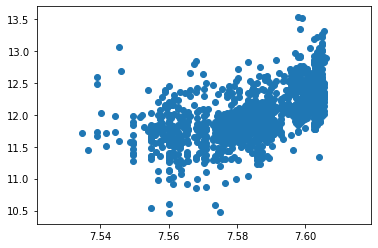

In [33]:
plt.scatter(df['YearBuilt'],df['SalePrice'])
plt.show()

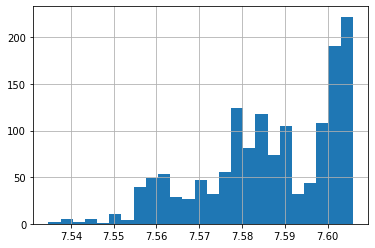

In [34]:
df['YearBuilt'].hist(bins=25)
plt.show()

In [36]:
df['YearBuilt'] = np.exp(df['YearBuilt'])

In [39]:
year_cols = df[['YearBuilt','YrSold']]
year_cols

,YearBuilt,YrSold
0,2003.0,2008
1,1976.0,2007
2,2001.0,2008
3,1915.0,2006
4,2000.0,2008
...,...,...
1455,1999.0,2007
1456,1978.0,2010
1457,1941.0,2010
1458,1950.0,2010


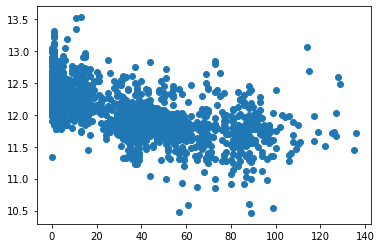

In [40]:
plt.scatter(df['YrSold']-df['YearBuilt'],df['SalePrice'])
plt.show()

In [41]:
df['HouseAge'] = df['YrSold']-df['YearBuilt']

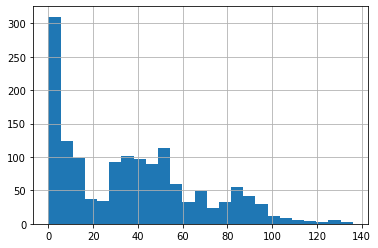

In [43]:
df['HouseAge'].hist(bins=25)
plt.show()

In [45]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice', 'HouseAge'],
      dtype='object')

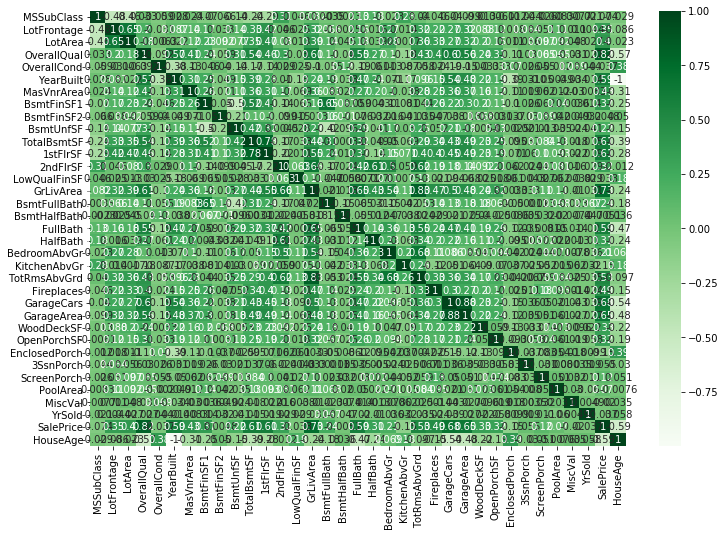

In [54]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='Greens',annot=True)

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['MSZoning'])

array([3, 3, 3, ..., 3, 3, 3])

In [61]:
categor = [f for f in df.columns if df[f].dtypes=='O']
for i in categor:
    if df[i].isnull().sum()>1:
        df[i].fillna('Missing',inplace=True)

In [66]:
for i in categor:
    df[i] = le.fit_transform(df[i])

In [67]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,HouseAge
0,60,3,4.174387,9.041922,3,4,5,5,7,5,...,0,61,0,0,0,0,0,2008,12.247694,5.0
1,20,3,4.382027,9.169518,3,2,24,2,6,8,...,298,0,0,0,0,0,0,2007,12.109011,31.0
2,60,3,4.219508,9.328123,0,4,5,5,7,5,...,0,42,0,0,0,0,0,2008,12.317167,7.0
3,70,3,4.094345,9.164296,0,0,6,5,7,5,...,0,35,272,0,0,0,0,2006,11.849398,91.0
4,60,3,4.430817,9.565214,0,2,15,5,8,5,...,192,84,0,0,0,0,0,2008,12.429216,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,4.127134,8.976768,3,4,8,5,6,5,...,0,40,0,0,0,0,0,2007,12.072541,8.0
1456,20,3,4.442651,9.486076,3,4,14,2,6,6,...,349,0,0,0,0,0,0,2010,12.254863,32.0
1457,70,3,4.189655,9.109636,3,4,6,5,7,9,...,0,60,0,0,0,0,2500,2010,12.493130,69.0
1458,20,3,4.219508,9.181632,3,4,12,2,5,6,...,366,0,112,0,0,0,0,2010,11.864462,60.0


In [68]:
features = [f for f in df.columns if f not in ['SalePrice']]
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit_transform(df[features])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.5       ,
        0.03676471],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.25      ,
        0.22794118],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.5       ,
        0.05147059],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.16129032, 1.        ,
        0.50735294],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 1.        ,
        0.44117647],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.5       ,
        0.31617647]])

In [69]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,HouseAge
0,60,3,4.174387,9.041922,3,4,5,5,7,5,...,0,61,0,0,0,0,0,2008,12.247694,5.0
1,20,3,4.382027,9.169518,3,2,24,2,6,8,...,298,0,0,0,0,0,0,2007,12.109011,31.0
2,60,3,4.219508,9.328123,0,4,5,5,7,5,...,0,42,0,0,0,0,0,2008,12.317167,7.0
3,70,3,4.094345,9.164296,0,0,6,5,7,5,...,0,35,272,0,0,0,0,2006,11.849398,91.0
4,60,3,4.430817,9.565214,0,2,15,5,8,5,...,192,84,0,0,0,0,0,2008,12.429216,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,4.127134,8.976768,3,4,8,5,6,5,...,0,40,0,0,0,0,0,2007,12.072541,8.0
1456,20,3,4.442651,9.486076,3,4,14,2,6,6,...,349,0,0,0,0,0,0,2010,12.254863,32.0
1457,70,3,4.189655,9.109636,3,4,6,5,7,9,...,0,60,0,0,0,0,2500,2010,12.493130,69.0
1458,20,3,4.219508,9.181632,3,4,12,2,5,6,...,366,0,112,0,0,0,0,2010,11.864462,60.0


In [70]:
ans = df['SalePrice']
df.drop(['SalePrice'],axis=1,inplace=True)

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,ans,test_size=0.2,random_state=30)

In [73]:
x_train.shape

(1168, 51)

In [74]:
x_test.shape

(292, 51)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lg = LinearRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'rmse = {rmse}')
print(f'r2 score = {r2}')

rmse = 0.020301022164037365
r2 score = 0.8779506208803041
